In [1]:
import torch

# 判断是否有可用的GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"当前使用的设备是: {device}")

当前使用的设备是: cuda


验证保存模型：

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# Maintain two lists: max_curve and min_curve,
# select the maximum value of loss in all models
# on the same step, add it to max_curve, and
# the minimum value to min_curve
# 加载不同模型的损失数据（假设均为二维数组：epochs × batches）
loss_vggA = np.loadtxt('loss_path/loss_vggA.txt')    # 示例形状 (20, 391)
loss_vggbn = np.loadtxt('loss_path/loss_vggbn.txt')  # 示例形状 (20, 391)

# 合并所有模型的损失数据（可扩展添加更多模型）
all_losses = [loss_vggA, loss_vggbn]  # 列表中的每个元素形状需一致
# 将每个模型的损失展平为步骤序列（假设所有模型训练步数相同）
all_losses_flattened = [loss.flatten() for loss in all_losses]  # 每个元素形状 (20*391,)

# 转换为二维数组（models × steps）
all_losses_array = np.stack(all_losses_flattened, axis=0)  # 形状 (2, 7820)


min_curve = []
max_curve = []
## --------------------
# Add your code
# 计算每个步骤的极值
max_curve = np.max(all_losses_array, axis=0)  # 形状 (7820,)
min_curve = np.min(all_losses_array, axis=0)

## --------------------

# Use this function to plot the final loss landscape,
# fill the area between the two curves can use plt.fill_between()
def plot_loss_landscape(max_curve, min_curve):
    ## --------------------
    # Add your code
    plt.figure(figsize=(12, 6))
    
    # 生成步骤序列
    steps = np.arange(len(max_curve))
    
    # 填充极值区域
    plt.fill_between(
        steps,
        min_curve,
        max_curve,
        color="skyblue",
        alpha=0.3,
        label="Loss Range"
    )
    
    # 绘制极值曲线（可选）
    plt.plot(steps, max_curve, "r--", lw=1, label="Max Loss")
    plt.plot(steps, min_curve, "b--", lw=1, label="Min Loss")
    
    # 美化图表
    plt.title("Loss Landscape Comparison (VGG_A vs VGG_BN)")
    plt.xlabel("Training Step")
    plt.ylabel("Loss Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    ## --------------------
    pass

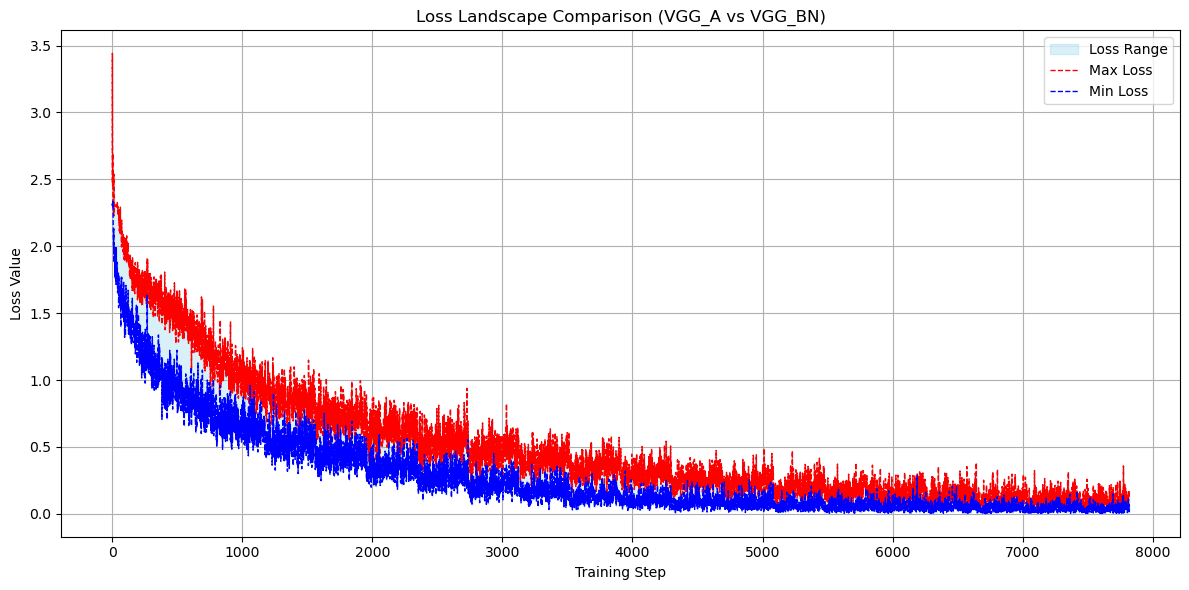

In [3]:
plot_loss_landscape(max_curve, min_curve)

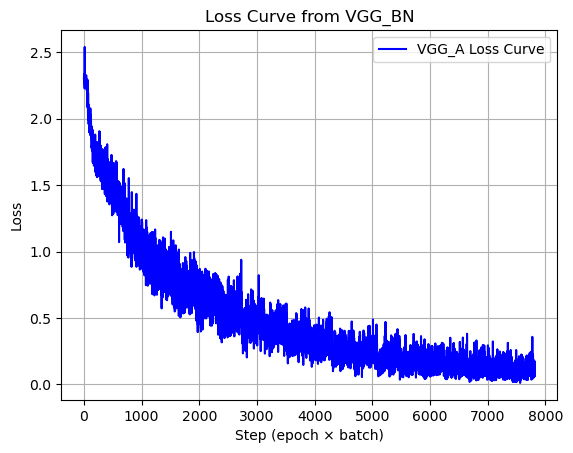

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 加载 loss 文件
loss_path = 'loss_path/loss_vggA.txt'
loss = np.loadtxt(loss_path)  # 自动按空格读取为二维数组

# 展平成 1D 曲线
flattened_loss = loss.flatten()

plt.plot(flattened_loss, label='VGG_A Loss Curve', color='blue')
plt.title("Loss Curve from VGG_BN")
plt.xlabel("Step (epoch × batch)")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

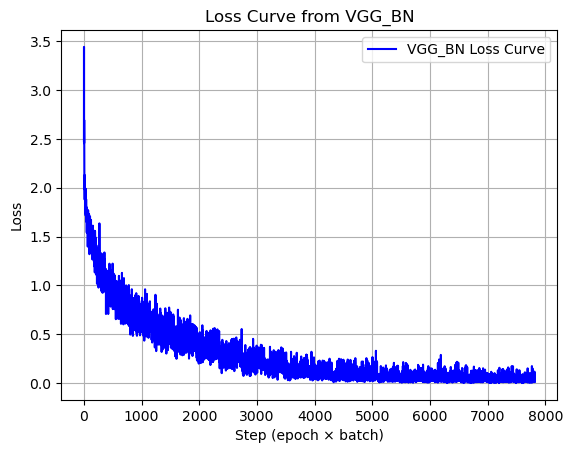

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 加载 loss 文件
loss_path = 'loss_path/loss_vggbn.txt'
loss = np.loadtxt(loss_path)  # 自动按空格读取为二维数组

# 展平成 1D 曲线
flattened_loss = loss.flatten()

plt.plot(flattened_loss, label='VGG_BN Loss Curve', color='blue')
plt.title("Loss Curve from VGG_BN")
plt.xlabel("Step (epoch × batch)")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

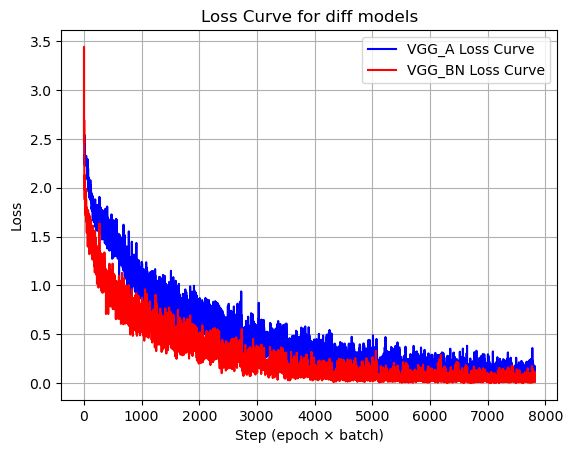

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 加载 loss 文件
loss_path = 'loss_path/loss_vggA.txt'
loss_VGGA = np.loadtxt(loss_path)  # 自动按空格读取为二维数组

# 展平成 1D 曲线
flattened_loss_VGGA = loss_vggA.flatten()

# 加载 loss 文件
loss_path = 'loss_path/loss_vggbn.txt'
loss_VGGBN = np.loadtxt(loss_path)  # 自动按空格读取为二维数组

# 展平成 1D 曲线
flattened_loss_VGGBN = loss_VGGBN.flatten()


plt.plot(flattened_loss_VGGA, label='VGG_A Loss Curve', color='blue')
plt.plot(flattened_loss_VGGBN, label='VGG_BN Loss Curve', color='red')
plt.title("Loss Curve for diff models")
plt.xlabel("Step (epoch × batch)")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

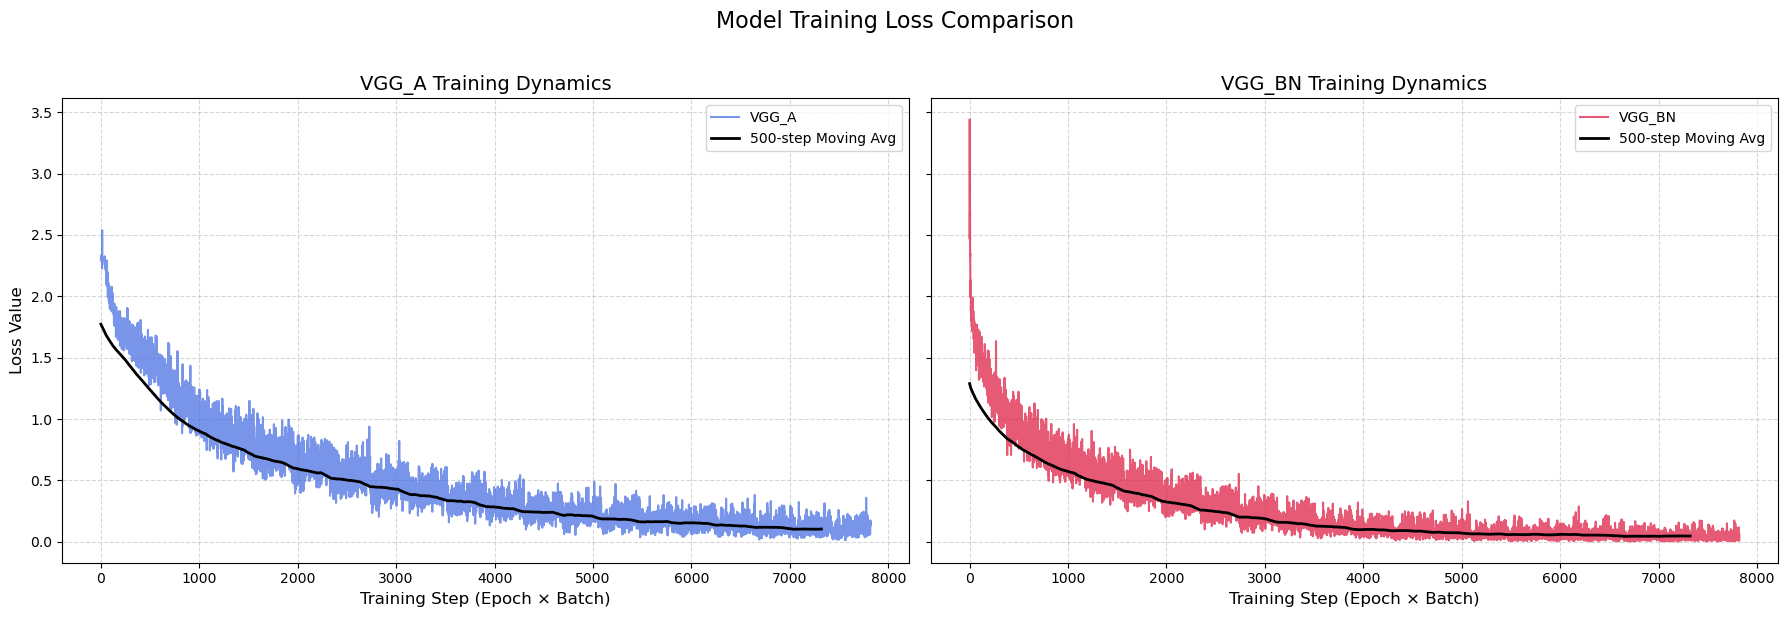

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 加载数据
loss_vggA = np.loadtxt('loss_path/loss_vggA.txt').flatten()  # (epochs*batches,)
loss_vggbn = np.loadtxt('loss_path/loss_vggbn.txt').flatten()

# 创建对比子图 (1行2列)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# ================= 左子图：VGG_A =================
ax1.plot(loss_vggA, color='royalblue', alpha=0.7, label='VGG_A')
ax1.set_title("VGG_A Training Dynamics", fontsize=14)
ax1.set_xlabel("Training Step (Epoch × Batch)", fontsize=12)
ax1.set_ylabel("Loss Value", fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)

# 添加动态分析
window_size = 500  # 滑动窗口大小
smoothed = np.convolve(loss_vggA, np.ones(window_size)/window_size, mode='valid')
ax1.plot(smoothed, color='black', linewidth=2, 
        label=f'{window_size}-step Moving Avg')

ax1.legend(loc='upper right')

# ================= 右子图：VGG_BN =================
line_vggbn = ax2.plot(loss_vggbn, color='crimson', alpha=0.7, label='VGG_BN')[0]
ax2.set_title("VGG_BN Training Dynamics", fontsize=14)
ax2.set_xlabel("Training Step (Epoch × Batch)", fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)

# 添加动态分析
window_size = 500  # 滑动窗口大小
smoothed = np.convolve(loss_vggbn, np.ones(window_size)/window_size, mode='valid')
ax2.plot(smoothed, color='black', linewidth=2, 
        label=f'{window_size}-step Moving Avg')

ax2.legend(loc='upper right')


plt.suptitle("Model Training Loss Comparison", fontsize=16, y=1.02)
plt.tight_layout()

plt.show()

可视化grad:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os

def load_and_calculate_norms(grad_path):
    """加载梯度数据并计算各批次范数"""
    grads = np.load(grad_path)  # 形状 (20, 391, 10, 512)
    
    # 计算每个batch的梯度范数（保留epoch和batch维度）
    batch_norms = np.linalg.norm(grads, axis=(2,3))  # 结果形状 (20, 391)
    
    # 计算每个epoch的平均范数
    epoch_norms = batch_norms.mean(axis=1)  # 形状 (20,)
    
    return batch_norms, epoch_norms

# 加载两个模型的梯度范数
vgga_batch_norms, vgga_epoch_norms = load_and_calculate_norms('grad_path/grads_vggA.npy')
vggbn_batch_norms, vggbn_epoch_norms = load_and_calculate_norms('grad_path/grads_vggbn.npy')

In [14]:
# 展平 batch_norms（每个是 2D）
vgga_batch_flat = np.array(vgga_batch_norms).flatten()
vggbn_batch_flat = np.array(vggbn_batch_norms).flatten()

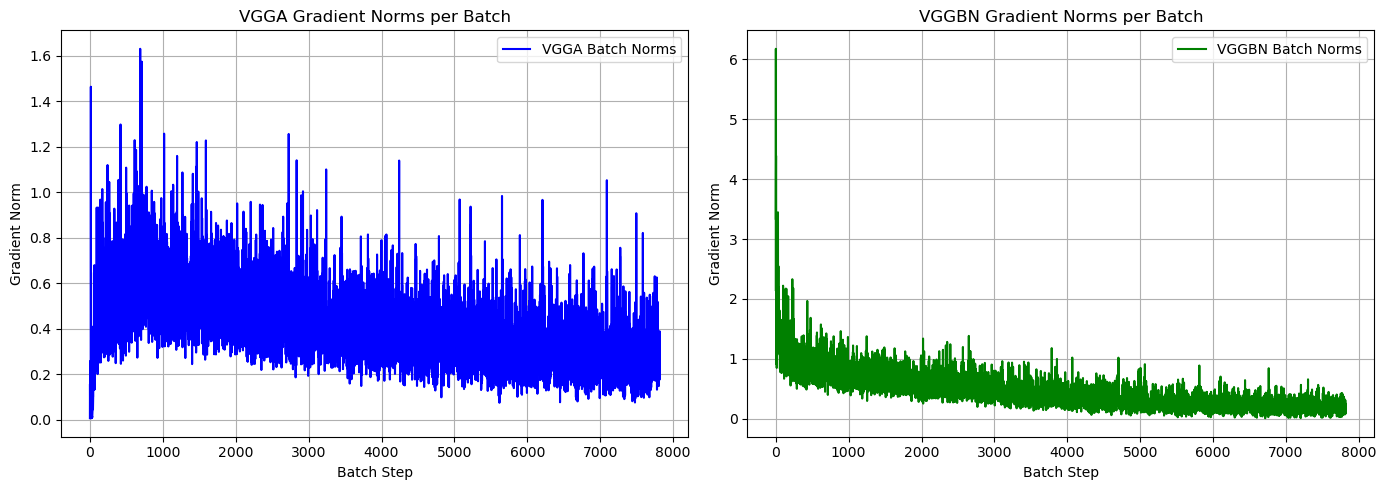

In [15]:
plt.figure(figsize=(14, 5))

# 左侧：VGGA
plt.subplot(1, 2, 1)
plt.plot(vgga_batch_flat, label='VGGA Batch Norms', color='blue')
plt.title("VGGA Gradient Norms per Batch")
plt.xlabel("Batch Step")
plt.ylabel("Gradient Norm")
plt.grid(True)
plt.legend()

# 右侧：VGGBN
plt.subplot(1, 2, 2)
plt.plot(vggbn_batch_flat, label='VGGBN Batch Norms', color='green')
plt.title("VGGBN Gradient Norms per Batch")
plt.xlabel("Batch Step")
plt.ylabel("Gradient Norm")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

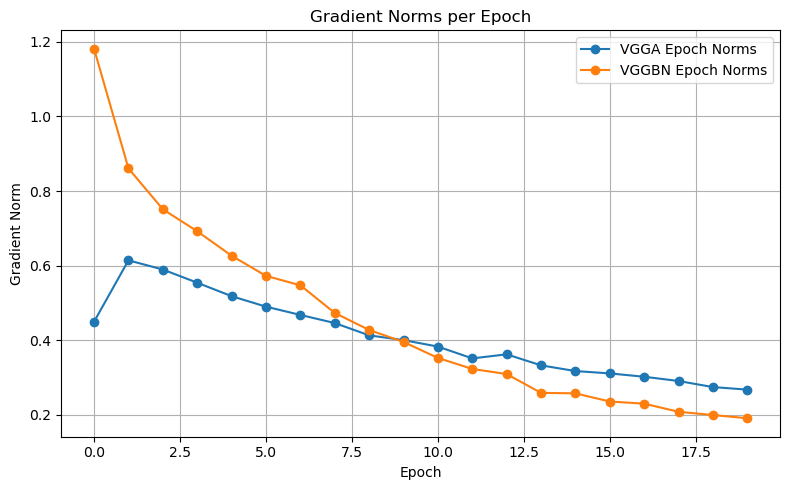

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(vgga_epoch_norms, label='VGGA Epoch Norms', marker='o')
plt.plot(vggbn_epoch_norms, label='VGGBN Epoch Norms', marker='o')
plt.title("Gradient Norms per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
def plot_trend_comparison():
    plt.figure(figsize=(15, 6))
    
    # 滑动平均处理
    window_size = 50
    vgga_smooth = np.convolve(vgga_batch_norms.flatten(), 
                             np.ones(window_size)/window_size, mode='valid')
    vggbn_smooth = np.convolve(vggbn_batch_norms.flatten(),
                              np.ones(window_size)/window_size, mode='valid')
    
    # 趋势对比
    plt.plot(vgga_smooth, color='blue', alpha=0.7, label='VGG_A')
    plt.plot(vggbn_smooth, color='red', alpha=0.7, label='VGG_BN')
    
    plt.title("Smoothed Gradient Norm Trends", fontsize=14)
    plt.xlabel("Training Step (Batch)", fontsize=12)
    plt.ylabel("Gradient Norm", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

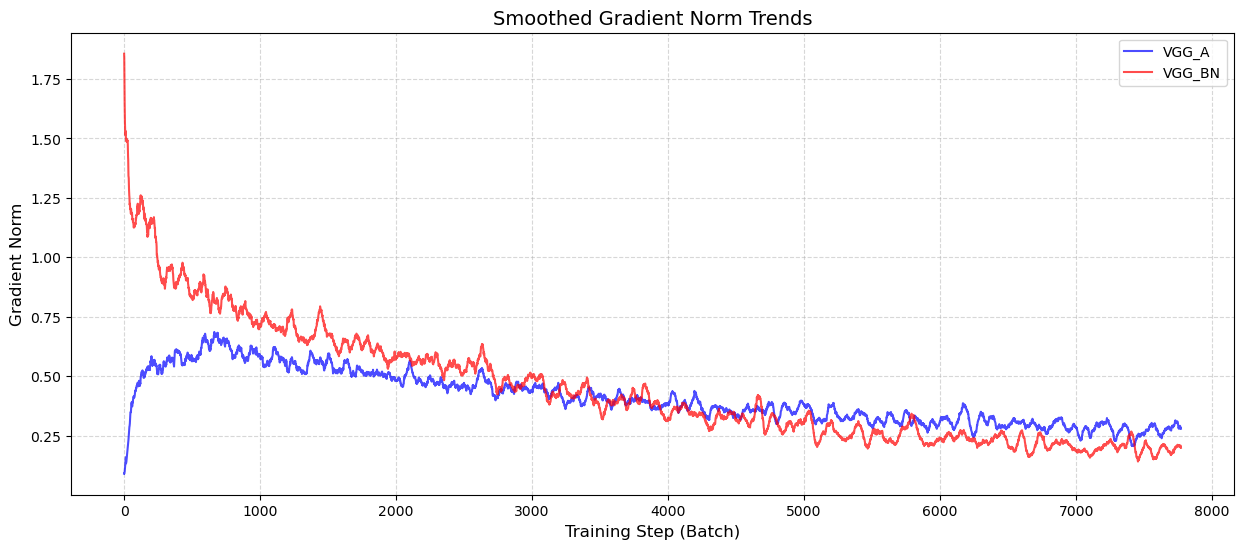

In [18]:
plot_trend_comparison()

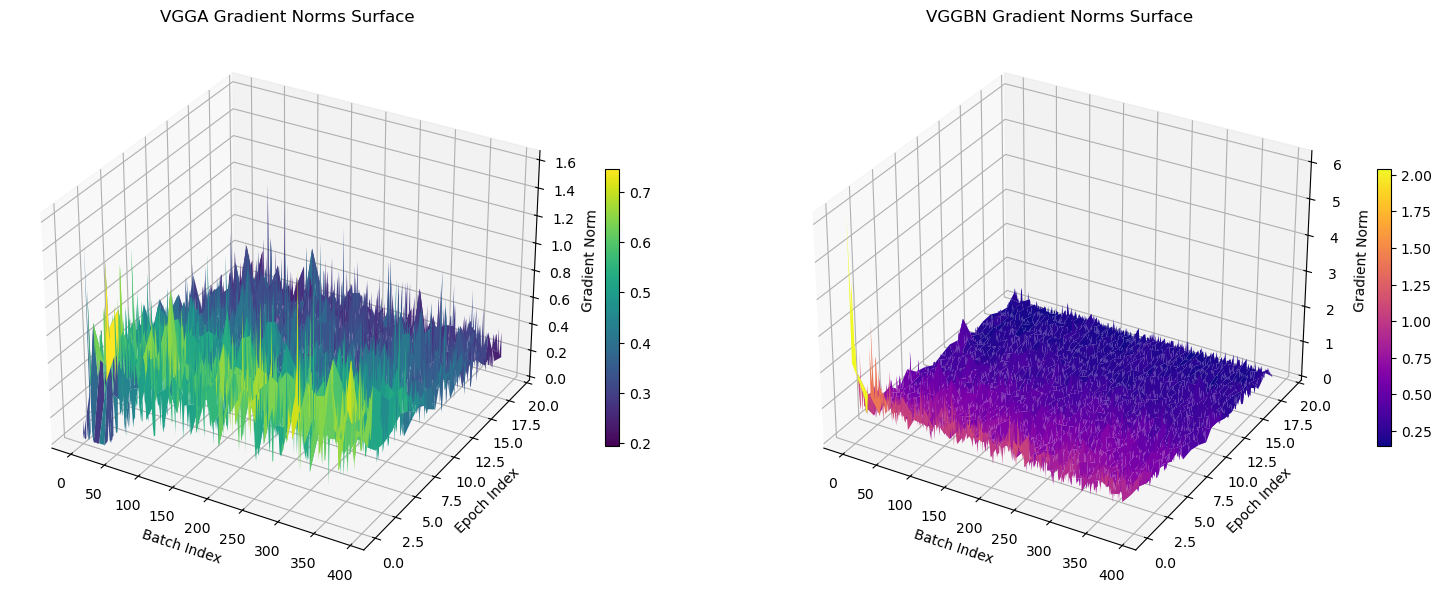

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 构建 meshgrid（必须 shape 一致）
epochs, batches = vgga_batch_norms.shape
X, Y = np.meshgrid(np.arange(batches), np.arange(epochs))

# 创建画布
fig = plt.figure(figsize=(16, 6))

# ------- 左图：VGGA -------
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax1.plot_surface(X, Y, vgga_batch_norms, cmap='viridis', edgecolor='none')
ax1.set_title('VGGA Gradient Norms Surface')
ax1.set_xlabel('Batch Index')
ax1.set_ylabel('Epoch Index')
ax1.set_zlabel('Gradient Norm')
fig.colorbar(surf1, ax=ax1, shrink=0.5)

# ------- 右图：VGGBN -------
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf2 = ax2.plot_surface(X, Y, vggbn_batch_norms, cmap='plasma', edgecolor='none')
ax2.set_title('VGGBN Gradient Norms Surface')
ax2.set_xlabel('Batch Index')
ax2.set_ylabel('Epoch Index')
ax2.set_zlabel('Gradient Norm')
fig.colorbar(surf2, ax=ax2, shrink=0.5)

plt.tight_layout()
plt.show()